In [1]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#reading dataset and overview of the datatype
df2 = pd.read_csv("catA_train.csv")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [3]:
#finding number of null values in dataset
df2.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [4]:
#finding out number of data points and features
df2.shape

(29182, 28)

In [5]:
df2.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


We choose to drop the rows without the following columns as they form small part of the dataset

In [6]:
#dropping the rows 
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE","Year Found","Parent Company", "Parent Country",
                         "Employees (Domestic Ultimate Total)","Global Ultimate Company","Global Ultimate Country"])

Only 1133 data points dropped which forms 3.88% of the total dataset which is a small amount

In [7]:
#checking if we dropped too many values
df2.shape

(28049, 28)

In [8]:
#removing inactive companies
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

In [9]:
df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

#df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
#                                       "Year Found"])

df3 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership_Type')
df3 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import_Export_Status')
df3 = df2.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active

In [10]:
df3.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                                 0
Parent Company                             0
Parent Country                             0
Company Description                        0
Square Footage                         28049
Employees (Single Site)                11970
Employees (Domestic Ultimate Total)        0
Employees (Global Ultimate Total)       2656
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Fiscal Year End                        21420
Global Ultimate Company                    0
Global Ultimate Country                    0
Domestic Ultimate Company                560
Is Domesti

In [11]:
sic_code_frequency = df3['SIC Code'].value_counts()

threshold = 10  # Adjust this threshold based on your preference

low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()

print(sic_code_frequency1)

SIC Code
6719.0    7449
8742.0    1339
Others    1280
7371.0     754
4731.0     718
          ... 
7629.0      10
7549.0      10
3663.0      10
8641.0      10
8021.0      10
Name: count, Length: 274, dtype: int64


In [12]:
df3['SIC Code'] = df3['SIC Code'].astype(str)
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])
df3["SIC Code"].unique()

array([219,  79, 200, 273, 133,  17, 226,  27, 202, 230, 168, 232,  87,
       213,  72, 267,   3, 258, 199,  75, 120, 271, 147, 126, 266, 270,
       206, 129,  89, 169,  36, 220, 111, 212,  93, 116, 132,  68,  82,
        97, 161, 143, 122, 197, 243, 196,  74, 248, 121,  46, 218, 105,
       193,  77,  73, 178, 223, 173,  15,  86, 154, 256, 203, 262, 130,
       183,  81, 207, 148,  29,  45, 236, 192,  96, 102, 235,  62, 149,
       139, 268,  24,  94, 216, 114, 101,  50, 272, 247, 152, 110, 109,
       255,  26,  78,  58, 180, 108, 151, 188, 205, 222, 157, 164,  64,
         1,   5, 229, 201, 224,  10, 117, 113,  42, 146, 174, 123, 241,
       175, 237, 252,  65, 181,   6, 263, 167,  84,  19, 214, 242, 124,
       171,  53, 227,  60, 254,   2,   9, 204, 269, 112, 215,  91, 150,
       107,  32, 260, 144, 250, 128, 195, 158, 253, 140,  52,  34,  11,
        13, 156, 159, 245,  67,  69, 185, 190, 100,  35,  30,   4,  95,
        71, 163,  33, 138, 162,  56, 134, 142,  85,  90, 104, 23

using correlation matrix to analyse the relationship between the features

In [13]:
numerical_df = df3.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,LATITUDE,LONGITUDE,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048409,-0.087665,-0.022973,NaN,0.000781,0.004491,-0.008617,0.004730,-0.009836,-0.006882,-0.041889
LONGITUDE,-0.048409,1.000000,0.026515,-0.008214,NaN,-0.006691,0.011598,0.004389,-0.007268,0.008834,0.001918,0.010644
8-Digit SIC Code,-0.087665,0.026515,1.000000,0.194342,NaN,-0.052122,-0.020214,0.001034,-0.011359,-0.014693,0.023178,0.092209
Year Found,-0.022973,-0.008214,0.194342,1.000000,NaN,-0.059886,-0.045373,-0.028188,0.015278,-0.022646,0.085756,0.118179
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.000781,-0.006691,-0.052122,-0.059886,NaN,1.000000,0.145332,0.006980,0.003563,0.000210,-0.018067,-0.001216
Employees (Domestic Ultimate Total),0.004491,0.011598,-0.020214,-0.045373,NaN,0.145332,1.000000,0.016121,0.016037,0.022484,-0.058562,-0.042898
Employees (Global Ultimate Total),-0.008617,0.004389,0.001034,-0.028188,NaN,0.006980,0.016121,1.000000,-0.004174,0.648946,0.083194,-0.088096
Sales (Domestic Ultimate Total USD),0.004730,-0.007268,-0.011359,0.015278,NaN,0.003563,0.016037,-0.004174,1.000000,0.099582,-0.056868,-0.040274
Sales (Global Ultimate Total USD),-0.009836,0.008834,-0.014693,-0.022646,NaN,0.000210,0.022484,0.648946,0.099582,1.000000,0.039051,-0.097496


In [14]:
filtered_df = df2[df2['SIC Code'].isin([5099, 1611, 8711, 4789])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
30,1.264843,103.818291,LAKB2BID1337916,STATKRAFT HOLDING CHILE PTE. LTD.,8711.0,Engineering Services,87110000.0,Engineering services,2003.0,Subsidiary,...,9830186.0,7.412580e+09,NaN,NaN,Statkraft Sf,Norway,STATKRAFT HOLDING SINGAPORE PTE. LTD.,0.0,0.0,True
48,1.309792,103.865024,LAKB2BID9109451,ZALL INTERNATIONAL COMMERCE (SINGAPORE) PTE. LTD.,5099.0,"Durable Goods, Not Elsewhere Classified",50990000.0,"Durable goods, nec",2020.0,Subsidiary,...,147815.0,1.478150e+05,NaN,2021-12-31T05:00:00Z,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,Singapore,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,0.0,0.0,True


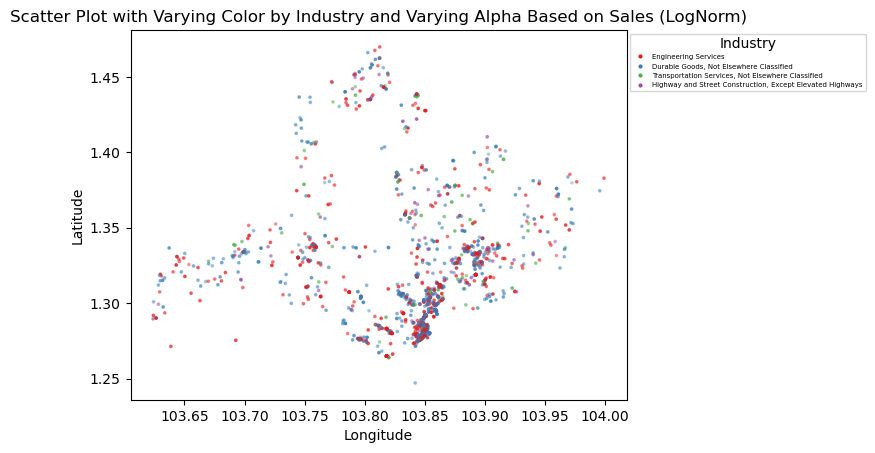

In [15]:
norm = LogNorm()
constant_color = 'blue'
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')
plt.show()

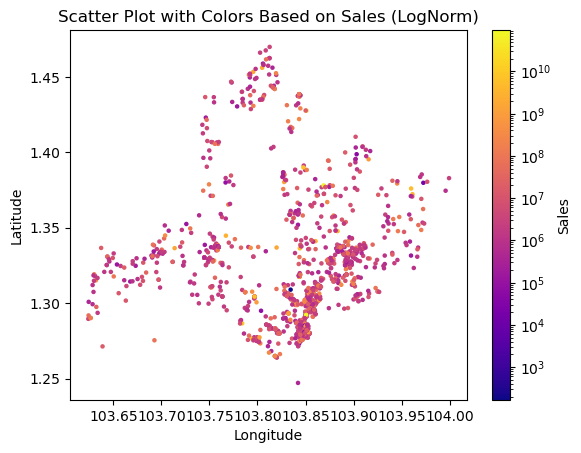

In [16]:
norm = LogNorm()
cmap = 'plasma'
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)
cbar = plt.colorbar(scatter, label='Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')
plt.show()

## Feature Selection

In [17]:
df3.columns

Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Parent Company', 'Parent Country', 'Company Description',
       'Square Footage', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Fiscal Year End',
       'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Import/Export Status_Missing'],
      dtype='object')

In [18]:
columns_to_drop = ["error", "Fiscal Year End", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Description", "AccountID",
                   "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]
df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')

In [19]:
df4.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
SIC Code                                   0
8-Digit SIC Code                           0
Year Found                                 0
Employees (Single Site)                11970
Employees (Domestic Ultimate Total)        0
Employees (Global Ultimate Total)       2656
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Is Domestic Ultimate                       0
Is Global Ultimate                         0
Import/Export Status_Missing               0
dtype: int64

-doing outlier imputation by replacing all null values with -1 to force machine learning algorithm to deal with missing values

-dropping rows without Employees (Global Ultimate Total) as they form small amount of the dataset

In [20]:
df4 = df4.dropna(subset=["Employees (Global Ultimate Total)"])
df4.fillna(-1, inplace=True)

converting Is Domestic Ultimate and Is Global Ultimate to binary values

In [21]:
df4['Is Domestic Ultimate'] = df4['Is Domestic Ultimate'] == 1
df4['Is Global Ultimate'] = df4['Is Global Ultimate'] == 1

In [22]:
df4.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', '8-Digit SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Import/Export Status_Missing'],
      dtype='object')

## Model Training and Evaluation

Using train, test, split to evaluate our data. we used gradient boosting regressor for our model


In [23]:
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(random_state=42)


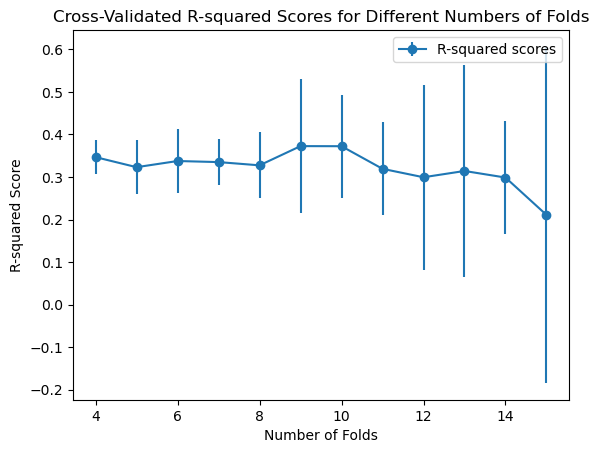

In [24]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

In [25]:
# Using k-fold cross-validation with 11 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=11, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [0.36907496 0.29339577 0.28872023 0.47187565 0.33279878 0.25832216
 0.27383642 0.43408504 0.44240745 0.29199295 0.05549879]
Mean R-squared score: 0.31927347143946283
Standard Deviation of R-squared scores: 0.10954379482672223
Test R-squared score: 0.37380089028940033
